In [1]:
import pandas as pd
#1.确定这几个数据都是干什么的
swiping_card_dataframe = pd.read_csv('./bus_swiping_card_info1.csv')
card_info_dataframe = pd.read_csv('./card_info.csv')
bus_swip_dataframe = pd.read_excel('公交数据.xlsx',sheet_name='刷卡数据',header=0,engine='openpyxl')
bus_station_dataframe = pd.read_excel('公交数据.xlsx',sheet_name='站点数据',header=0,engine='openpyxl')
#swiping_card_dataframe ： 每次刷卡的信息：几号线，第几站，车辆的id，刷卡的id，刷卡的时间
#card_info_dataframe ： 每次刷卡的信息：几号线，第几站，车辆的id，刷卡的id，刷卡的时间也是上面的信息，但是时间是去年的。
#用去年的时间的同比数据，去预测今年的同比数据，看是否一致，如果一致，说明经济发展没有变化，如果变大，说明经济好转
#bus_swip_dataframe ：一天的统计信息：各条线路、各个站点的刷卡数量信息
#bus_station_dataframe ： 站点的统计信息：各个站点的经纬度

station_lat_lon_dataframe = bus_station_dataframe.groupby('station_name').agg({'latitude':list,'longitude':list}).reset_index()
station_lat_lon_dataframe['lat'] = station_lat_lon_dataframe['latitude'].apply(lambda x:x[0])
station_lat_lon_dataframe['lon'] = station_lat_lon_dataframe['longitude'].apply(lambda x:x[0])
station_lat_lon_dataframe.drop(labels=['latitude','longitude'],axis=1,inplace=True)
station_lat_lon_dataframe['lat_lon']=station_lat_lon_dataframe.apply(lambda x:(x['lat'],x['lon']),axis=1)
#station_lat_lon_dataframe.drop(labels=['lat','lon'],axis=1,inplace=True)
station_lat_lon_ndarray = station_lat_lon_dataframe.values

In [2]:
len(station_lat_lon_ndarray)

1449

# 绘制地图

In [3]:
site_data = []
for line_index in range(len(station_lat_lon_dataframe)):
    row =  station_lat_lon_dataframe[line_index:line_index+1]
    temp={'lat':row['lat'].values[0],'lon':row['lon'].values[0],'name':row['station_name'].values[0],'station_id':line_index}
    site_data.append(temp)
site_data
lat = [site['lat'] for site in site_data]
lon = [site['lon'] for site in site_data]
min(lat),max(lat),min(lon),max(lon)
# 绘制站点坐标
sites = [(site['lat'],site['lon']) for site in site_data]  # 示例坐标

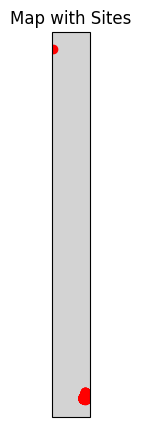

In [5]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
# 创建地图
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
# 绘制地图边界和海岸线
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, color='lightgray')
ax.add_feature(cartopy.feature.OCEAN, color='aqua')
for site in sites:
    ax.plot(site[1], site[0], 'ro', transform=ccrs.PlateCarree())  # 红色圆点表示站点
plt.title('Map with Sites')
plt.show()

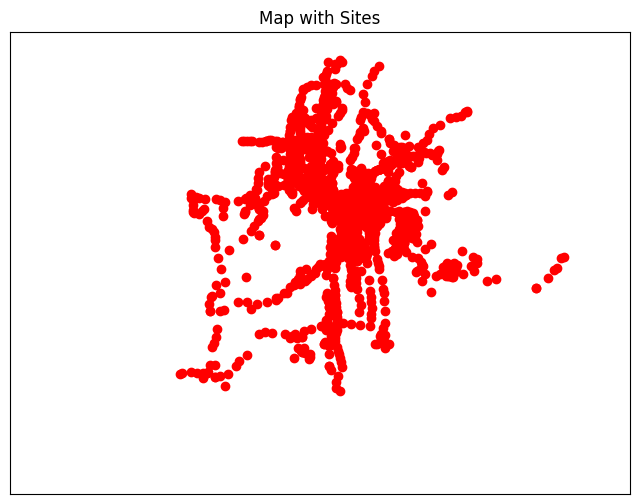

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# 创建地图
plt.figure(figsize=(8, 8))
m = Basemap(projection='merc', lat_0=26.5, lon_0=106.7, 
            llcrnrlat=26.2, urcrnrlat=26.8, 
            llcrnrlon=106.2, urcrnrlon=107.1, 
            resolution='l')
# 绘制地图边界和海岸线
m.drawcoastlines()
m.drawcountries()
#m.fillcontinents(color='lightgray', lake_color='aqua')
# 绘制站点坐标
# 假设站点坐标存储在一个列表中，格式为 [(longitude1, latitude1), (longitude2, latitude2), ...]
#sites = [(0, 0), (30, 30), (-30, -30)]  # 示例坐标
for site in sites:
    #print(site[1],site[0])
    x, y = m(site[1], site[0])
    #print(site[0], site[1])
    #m.plot(site[0], site[1], 'ro')  # 红色圆点表示站点
    m.plot(x, y, 'ro')  # 红色圆点表示站点
plt.title('Map with Sites')
# 保存图形为SVG格式
#plt.savefig('./figures/stations_map.svg', format='svg')
plt.show()

# 计算距离并排序

In [7]:
station_sequence_ndarray = station_lat_lon_dataframe['station_name'].values
station_sequence_ndarray
import numpy as np
#np.savetxt('./station_sequence_ndarray.txt',station_sequence_ndarray,fmt='%s')
station_nums_setting = len(station_sequence_ndarray)

In [8]:
station_nums_setting

1449

In [ ]:
import itertools
from geopy import distance
iters=0
station_pair_distance=[]
station_pair_distance_temp=[]
for station_pair_instance in itertools.product(station_lat_lon_ndarray,station_lat_lon_ndarray):
    station_0 = station_pair_instance[0]
    station_1 = station_pair_instance[1]
    station_0_position = station_0[1]
    station_1_position = station_1[1]
    dist = distance.distance(station_0_position,station_1_position).m
    if iters % station_nums_setting==0:
        if iters!=0:
            station_pair_distance.append(station_pair_distance_temp)
        station_pair_distance_temp=[]
        station_pair_distance_temp.append(dist)
    else:
        station_pair_distance_temp.append(dist)
    iters +=1
print(station_pair_distance[0])

In [ ]:
import csv
# 保存列表到文件中
with open('./datas/station_pair_distance.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(station_pair_distance)
print("文件保存成功！")

In [10]:
station_pair_distance = station_distance_rank_index_list = np.loadtxt('./datas/station_pair_distance.csv',delimiter=',')
station_pair_distance

array([[0.00000000e+00, 2.14551444e+03, 1.94988504e+04, ...,
        4.04721320e+04, 4.26418834e+04, 1.34652825e+04],
       [2.14551444e+03, 0.00000000e+00, 2.15033305e+04, ...,
        4.16830707e+04, 4.39997033e+04, 1.54941635e+04],
       [1.94988504e+04, 2.15033305e+04, 0.00000000e+00, ...,
        2.69013716e+04, 2.75017219e+04, 1.31808173e+04],
       ...,
       [4.04749465e+04, 4.16857134e+04, 2.69055592e+04, ...,
        4.82760225e+00, 4.24974971e+03, 3.97480590e+04],
       [4.04721320e+04, 4.16830707e+04, 2.69013716e+04, ...,
        0.00000000e+00, 4.24761794e+03, 3.97441064e+04],
       [4.26418834e+04, 4.39997033e+04, 2.75017219e+04, ...,
        4.24761794e+03, 0.00000000e+00, 4.06162396e+04]])

In [11]:
station_pair_distance[0][0:10]

array([0.00000000e+00, 2.14551444e+03, 1.94988504e+04, 2.17036346e+04,
       1.90949666e+04, 2.26958964e+04, 4.49884313e+06, 2.04896290e+04,
       1.57343230e+04, 4.44799650e+03])

In [ ]:
station_pair_distance_ndarray = np.array(station_pair_distance)
# 找出每行最小的k个值所对应的索引
station_distance_rank_index_list = [sorted(range(len(row)), key=lambda i: row[i]) for row in station_pair_distance_ndarray]
# 保存列表到文件中
with open('./station_pair_distance_rank_index.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(station_distance_rank_index_list)
print("文件保存成功！")

In [12]:
station_distance_rank_index_list = [sorted(range(len(row)), key=lambda i: row[i]) for row in station_pair_distance]

In [16]:
station_list = station_distance_rank_index_list[0][0:10]
distance = [station_pair_distance[0][id] for id in station_list]
distance

[0.0,
 321.81251849286264,
 724.5687536525421,
 746.2495938000633,
 1031.1501342504405,
 1221.1465348734125,
 1275.9321347219338,
 1364.4215580844502,
 1473.404411597243,
 1497.279402928429]

In [ ]:
station_sequence_ndarray = station_lat_lon_dataframe['station_name'].values
station_sequence_ndarray

In [ ]:
# 创建字典并填充数据
station_2_id = {value: index for index, value in enumerate(station_sequence_ndarray)}
station_2_id

In [ ]:
# 创建字典并填充数据
id_2_station = {index: value for index, value in enumerate(station_sequence_ndarray)}
id_2_station

In [ ]:
import json
# 将字典保存到文件中
with open('./id_2_station.json', 'w') as file:
    json.dump(id_2_station, file)
# 将字典保存到文件中
with open('./station_2_id.json', 'w') as file:
    json.dump(station_2_id, file)

In [ ]:
import heapq
# 要找出的最小的k个值
k = 3
# 使用列表推导式找出每行的最小的k个值
station_distance_k_values = [heapq.nsmallest(k, row) for row in station_pair_distance]
print(station_distance_k_values)

In [ ]:
# 将列表转换为NumPy数组
station_pair_distance_ndarray = np.array(station_pair_distance)
# 每行的最小的k个值所对应的index
k = 1  # 可以自定义k的值
station_pair_distance_min_k_indices = [np.argpartition(row, k)[:k] for row in station_pair_distance_ndarray]
print(station_pair_distance_min_k_indices)

In [ ]:
# 找出每行最小的k个值所对应的索引
k=6
station_distance_min_indices = [sorted(range(len(row)), key=lambda i: row[i])[:k] for row in station_pair_distance]
station_distance_min_indices
# 按照值的大小对索引进行排序
#sorted_indices = sorted(range(len(data)), key=lambda i: data[i][min_indices[i][0]])

#print("按照最小值所对应的索引进行排序后的结果：", sorted_indices)